# Spring 2025 Final Project

Employee Attrition Prediction

This notebook presents a full machine learning workflow to predict which employees are at risk of leaving an organization. It was developed as a team project by Yatharth Kumar and Gelareh Vakili for the DS 602 course at UMBC.

We walk through each stage of the process — from cleaning the data and building features to modeling and interpreting results — using a real-world dataset of workplace behavior. Along the way, we:

- Handle missing data and prep the dataset
- Engineer useful features for modeling
- Apply scaling and encoding
- Train multiple classification models
- Tune hyperparameters and validate with cross-validation
- Evaluate using metrics like accuracy, precision, recall, and F1-score
- Reflect on what the models tell us and how this could be used in practice

This project emphasizes thoughtful feature design, model interpretability, and practical application of concepts we’ve studied throughout the course.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import joblib
from sklearn.naive_bayes import GaussianNB

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
df.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,StressLevel,PeerFeedbackScore,AnnualLeaveDays,Certifications,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview
0,100,1,>30miles,7,91,4,14,3,8,1,2,94.824162,3,2,3,0,0,2,3,2,9,5,5,72K,73K,4.0,4.0
1,101,0,~10miles,10,52,5,9,2,10,0,2,95.117962,4,5,4,0,0,1,3,4,8,1,1,62K,64K,4.0,4.0
2,102,0,~10miles,10,80,3,13,3,16,0,2,80.556119,1,1,2,1,0,3,7,2,7,8,5,73K,74K,4.0,2.0
3,103,0,~15miles,5,6,3,15,5,16,0,3,90.532289,1,1,21,1,1,4,6,9,5,5,1,63K,64K,5.0,5.0
4,104,1,~10miles,10,3,2,13,3,18,0,3,83.009190,3,3,16,1,0,3,3,4,4,4,2,60K,64K,4.0,4.0


In [7]:
df.columns

Index(['RecordId', 'Gender', 'Distance', 'YearsWorked', 'TrainingHours',
       'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize',
       'MentorshipReceived', 'TechSkillLevel', 'AttendanceRate', 'StressLevel',
       'PeerFeedbackScore', 'AnnualLeaveDays', 'Certifications',
       'SkillDevelopmentCourses', 'ProjectComplexity', 'WorkSatisfactionScore',
       'JobEngagementScore', 'PhysicalActivityScore', 'MentalWellbeingScore',
       'DepartmentCode', 'PreviousSalary', 'Salary', 'SelfReview',
       'SupervisorReview'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 500000 non-null  int64  
 1   Gender                   500000 non-null  int64  
 2   Distance                 499492 non-null  object 
 3   YearsWorked              500000 non-null  int64  
 4   TrainingHours            500000 non-null  int64  
 5   WorkLifeBalance          500000 non-null  int64  
 6   NumOfProjects            500000 non-null  int64  
 7   JobInvolvement           500000 non-null  int64  
 8   TeamSize                 500000 non-null  int64  
 9   MentorshipReceived       500000 non-null  int64  
 10  TechSkillLevel           500000 non-null  int64  
 11  AttendanceRate           500000 non-null  float64
 12  StressLevel              500000 non-null  int64  
 13  PeerFeedbackScore        500000 non-null  int64  
 14  Annu

In [9]:
df.isnull().sum()

RecordId                      0
Gender                        0
Distance                    508
YearsWorked                   0
TrainingHours                 0
WorkLifeBalance               0
NumOfProjects                 0
JobInvolvement                0
TeamSize                      0
MentorshipReceived            0
TechSkillLevel                0
AttendanceRate                0
StressLevel                   0
PeerFeedbackScore             0
AnnualLeaveDays               0
Certifications                0
SkillDevelopmentCourses       0
ProjectComplexity             0
WorkSatisfactionScore         0
JobEngagementScore            0
PhysicalActivityScore         0
MentalWellbeingScore          0
DepartmentCode                0
PreviousSalary                0
Salary                        0
SelfReview                 1042
SupervisorReview            995
dtype: int64

In [10]:
df.describe()

,RecordId,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,AttendanceRate,StressLevel,PeerFeedbackScore,AnnualLeaveDays,Certifications,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,SelfReview,SupervisorReview
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,498958.000000,499005.000000
mean,250099.500000,0.401232,7.002552,49.483502,3.002836,10.007036,2.996948,9.998880,0.50067,2.999154,89.995120,3.002938,3.001480,14.507630,2.001654,0.499882,3.001772,4.997358,4.995824,4.996368,5.003052,3.999612,4.399968,4.096981
std,144337.711634,0.490148,1.868050,28.866048,1.413991,5.478671,1.414536,5.479373,0.50000,1.414082,5.777631,1.414613,1.413698,8.655087,1.414642,0.500000,1.413426,2.583222,2.582022,2.579361,2.580972,2.161918,0.663515,0.945597
min,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,80.000028,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000
25%,125099.750000,0.000000,6.000000,24.000000,2.000000,5.000000,2.000000,5.000000,0.00000,2.000000,84.987994,2.000000,2.000000,7.000000,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000
50%,250099.500000,0.000000,7.000000,50.000000,3.000000,10.000000,3.000000,10.000000,1.00000,3.000000,89.988886,3.000000,3.000000,15.000000,2.000000,0.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,375099.250000,1.000000,8.000000,74.000000,4.000000,15.000000,4.000000,15.000000,1.00000,4.000000,94.998259,4.000000,4.000000,22.000000,3.000000,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,5.000000
max,500099.000000,1.000000,14.000000,99.000000,5.000000,19.000000,5.000000,19.000000,1.00000,5.000000,99.999971,5.000000,5.000000,29.000000,4.000000,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,7.000000,5.000000,5.000000


### Data Cleaning: Handling Missing Values

Before applying clustering algorithms, we need to handle missing values to avoid errors and preserve data quality.

We identified three columns with missing values:

- **Distance** (508 missing): This is a categorical column, so we'll impute missing values using the **most frequent category**.
- **SelfReview** (1,042 missing) and **SupervisorReview** (995 missing): These are numeric rating fields, and since fewer than 1% of entries are missing, we’ll impute them with the **mean**.

This approach avoids dropping valuable records and preserves the overall distribution.

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
df['Distance'].fillna(df['Distance'].mode()[0], inplace=True)
df['SelfReview'].fillna(df['SelfReview'].median(), inplace=True)
df['SupervisorReview'].fillna(df['SupervisorReview'].median(), inplace=True)

In [14]:
df.isnull().sum()

RecordId                   0
Gender                     0
Distance                   0
YearsWorked                0
TrainingHours              0
WorkLifeBalance            0
NumOfProjects              0
JobInvolvement             0
TeamSize                   0
MentorshipReceived         0
TechSkillLevel             0
AttendanceRate             0
StressLevel                0
PeerFeedbackScore          0
AnnualLeaveDays            0
Certifications             0
SkillDevelopmentCourses    0
ProjectComplexity          0
WorkSatisfactionScore      0
JobEngagementScore         0
PhysicalActivityScore      0
MentalWellbeingScore       0
DepartmentCode             0
PreviousSalary             0
Salary                     0
SelfReview                 0
SupervisorReview           0
dtype: int64

In [15]:
df['SelfReview'].describe()

count    500000.000000
mean          4.401218
std           0.663388
min           3.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: SelfReview, dtype: float64

In [16]:
df['SupervisorReview'].describe()

count    500000.000000
mean          4.096788
std           0.944666
min           2.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: SupervisorReview, dtype: float64

<b>No significant change while imputing missing values</b>

#### Fixing Salary and Previous Salary datatype

In [19]:
df['Salary'] = df['Salary'].str.replace('K', '000', regex=True).astype(int)
df['PreviousSalary'] = df['PreviousSalary'].str.replace('K', '000', regex=True).astype(int)

#### We just have distance feature which is categorical

In [21]:
print(df['Distance'].unique())

['>30miles' '~10miles' '~15miles' '~20miles' '<5mile']


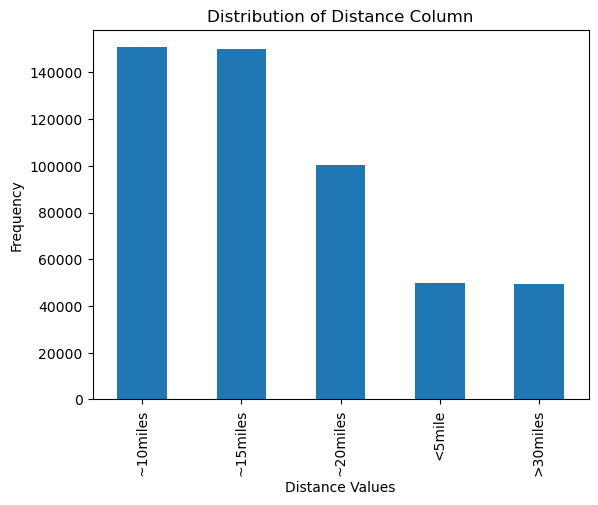

In [22]:
df['Distance'].value_counts().plot(kind='bar')
plt.xlabel("Distance Values")
plt.ylabel("Frequency")
plt.title("Distribution of Distance Column")
plt.show()

### Exploratory Data Analysis: Numeric Feature Distributions

To prepare for clustering, it's helpful to understand the distribution of key numeric features. Well-separated or multi-modal distributions may indicate good candidates for clustering.

Below, we visualize a few features that are likely to influence employee grouping:  
- `WorkLifeBalance`  
- `TeamSize`  
- `StressLevel`  
- `AttendanceRate`  
- `JobEngagementScore`  
- `WorkSatisfactionScore`

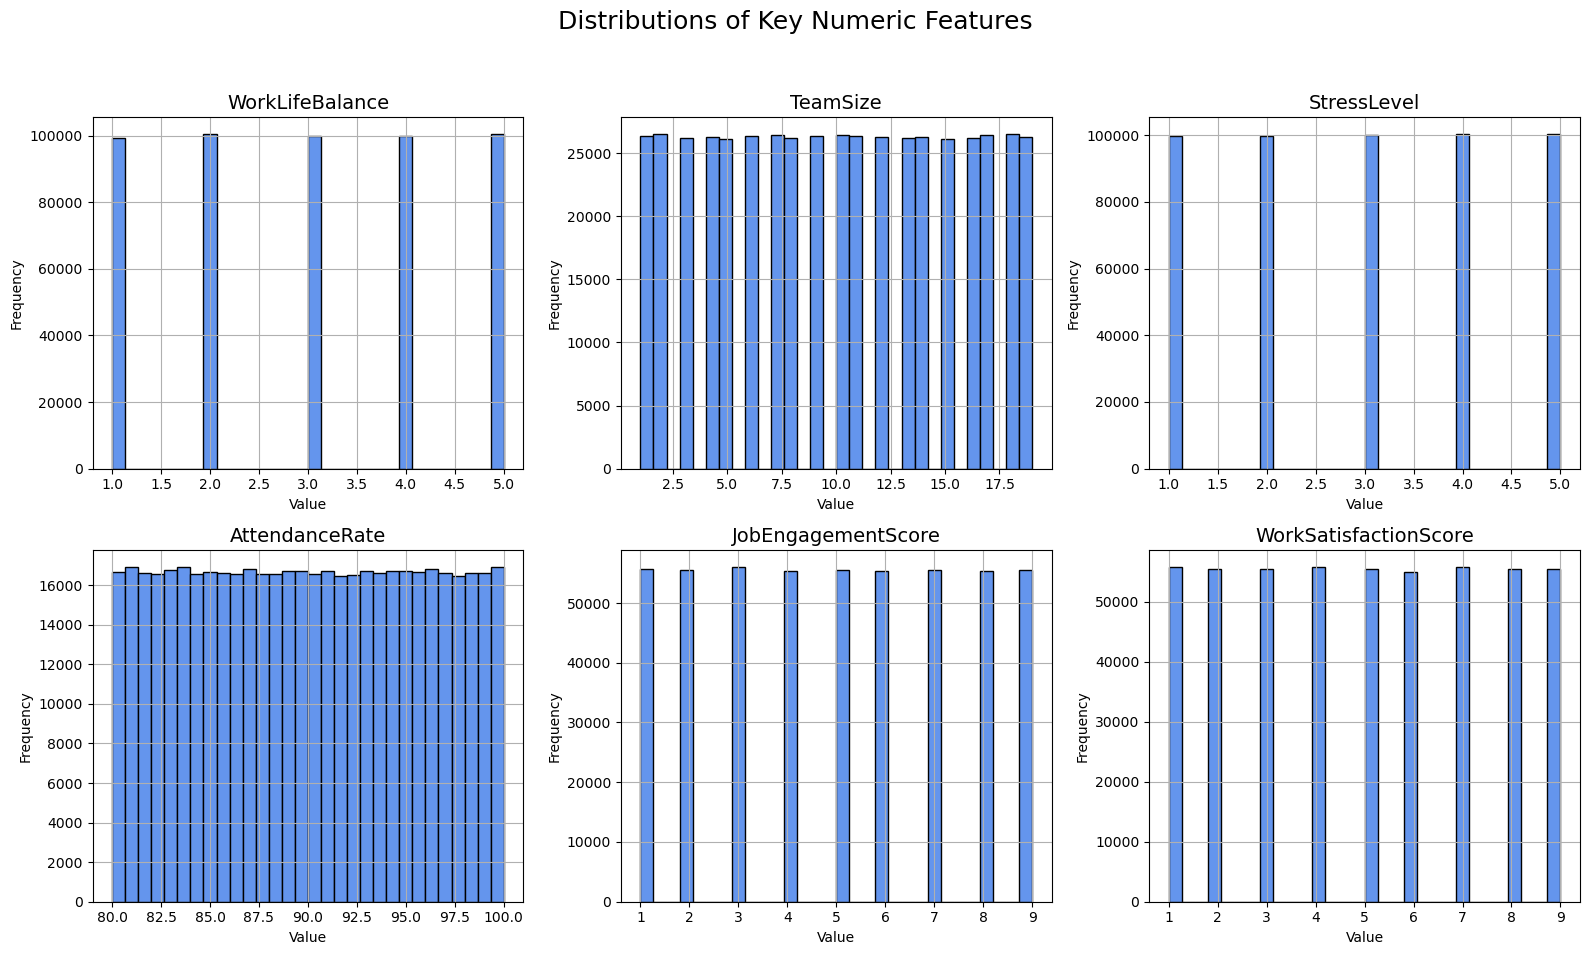

In [24]:
features_to_plot = [
    'WorkLifeBalance', 'TeamSize', 'StressLevel',
    'AttendanceRate', 'JobEngagementScore', 'WorkSatisfactionScore'
]

# Set up figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    axes[i].hist(df[feature], bins=30, color='cornflowerblue', edgecolor='black')
    axes[i].set_title(f"{feature}", fontsize=14)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.suptitle("Distributions of Key Numeric Features", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Summary of Numeric Feature Distributions

From the histograms, we observe the following patterns:

- **WorkLifeBalance** and **StressLevel** are integer-based and show near-uniform distributions across their scales, suggesting they won’t dominate clustering due to imbalance.
  
- **TeamSize** appears slightly right-skewed, with many employees on smaller teams but a long tail toward larger teams. This may affect how centroids behave, so scaling is important.

- **AttendanceRate** is tightly packed between 80–100%, with a small range and little variance. It may not strongly influence clustering unless normalized.

- **JobEngagementScore** and **WorkSatisfactionScore** show broad variation with peaks around moderate values. These features might provide useful separation for clusters.

Overall, the features vary in their scales and distributions, so we will **standardize numeric features** and **encode categorical variables** before applying clustering algorithms.

### Feature extraction, importance and selection

In [27]:
# 1. Workload Stress Index
df['WorkloadStress'] = (df['ProjectComplexity'] * df['NumOfProjects']) / df['TeamSize']

# 2. Career Stagnation Score
df['CareerGrowth'] = df['Certifications'] + df['SkillDevelopmentCourses'] - df['YearsWorked']/5

# 3. Engagement-Reward Disparity
df['RewardDisparity'] = (df['WorkSatisfactionScore'] - df['Salary'].rank(pct=True))

In [28]:
nums=['CareerGrowth',
    'WorkloadStress',
    'Salary',
    'PreviousSalary',
    'RewardDisparity',
    'Gender',
    'YearsWorked',	
    'TrainingHours'	,
    'WorkLifeBalance',
    'NumOfProjects',	
    'JobInvolvement',	
    'TeamSize',	
    'MentorshipReceived',	
    'TechSkillLevel',	
    'AttendanceRate',	
    'StressLevel',	
    'PeerFeedbackScore',	
    'AnnualLeaveDays',	
    'Certifications',	
    'SkillDevelopmentCourses',	
    'ProjectComplexity',	
    'WorkSatisfactionScore',
    'JobEngagementScore',	
    'PhysicalActivityScore',	
    'MentalWellbeingScore',	
    'DepartmentCode',	
    'SelfReview',	
    'SupervisorReview'
]
cats=['Distance']

### Feature Importance Analysis

To better understand which features contribute most to predicting employee attrition, we use two different approaches:

1. **Random Forest Feature Importance**  
   We train a Random Forest classifier and extract feature importance scores based on how frequently features are used in decision splits. This model-based approach highlights the features that the classifier finds most useful for improving accuracy.

2. **Mutual Information Scores**  
   Mutual Information measures how much knowing the value of a feature reduces uncertainty about the target variable. This method is model-agnostic and gives us a statistical sense of relevance between each feature and employee departure.

By comparing these two views, we gain both a model-driven and a data-driven perspective on which variables are most informative for attrition prediction.

In [30]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
y = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')
rnd_clf.fit(df[nums], y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

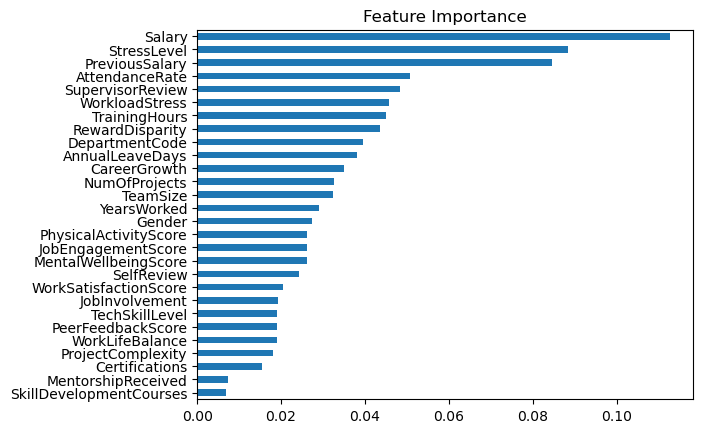

In [31]:
imps=list(zip(df[nums],rnd_clf.feature_importances_))
fi=pd.Series([x[1] for x in imps], index=[x[0] for x in imps])
fi=fi.sort_values(ascending=True)
fi.plot.barh()
plt.title('Feature Importance')
plt.show()

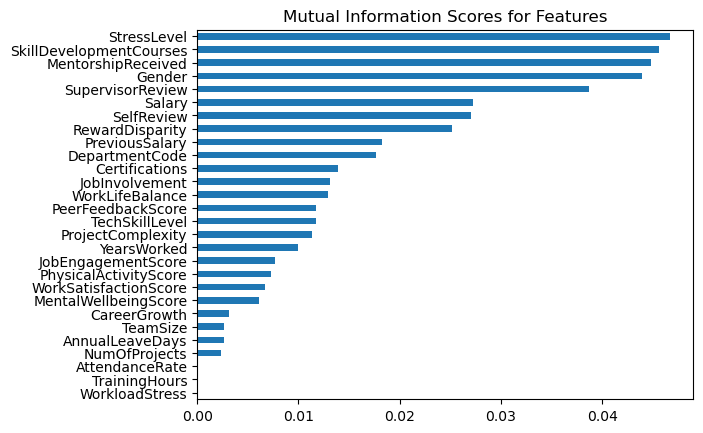

In [32]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df[nums], y)
mi_series = pd.Series(mi_scores, index=nums).sort_values(ascending=True)

mi_series.plot.barh()
plt.title("Mutual Information Scores for Features")
plt.show()

In [33]:
from sklearn.feature_selection import RFE


model = LogisticRegression(max_iter=1000) 

# Initialize RFE with desired number of features
num_features = 10
rfe = RFE(estimator=model, n_features_to_select=num_features)

rfe.fit(df[nums], y)

selected_features = df[nums].columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['CareerGrowth', 'RewardDisparity', 'Gender', 'YearsWorked',
       'MentorshipReceived', 'StressLevel', 'WorkSatisfactionScore',
       'DepartmentCode', 'SelfReview', 'SupervisorReview'],
      dtype='object')


#### Final selected features-

In [35]:
nums=['CareerGrowth', 
      'RewardDisparity',
      'Gender',
      'YearsWorked',      
      'MentorshipReceived',
      'WorkSatisfactionScore',
      'DepartmentCode',
      'SelfReview',
      'SupervisorReview',
      'Salary',
      'StressLevel',
      'PreviousSalary',
      'AttendanceRate',
      'SkillDevelopmentCourses'
     ]
cats=['Distance']

### Summary: Comparing Feature Selection Methods

To identify the most relevant features for predicting employee attrition, we used three complementary methods:

- **Recursive Feature Elimination (RFE)**: A model-based approach using Logistic Regression to recursively remove the least important features. This method favors features with strong linear relationships to the target.
  
- **Random Forest Feature Importances**: A tree-based model that ranks features based on how often they’re used in splits across 200 decision trees. This method captures nonlinear interactions and complex relationships.

- **Mutual Information Scores (MIS)**: A statistical, model-agnostic method that measures the amount of information each feature provides about the target variable.

While each method produces slightly different rankings, several features (such as `StressLevel`, `WorkLifeBalance`, and `SupervisorReview`) consistently appear across all approaches. These features are strong candidates for inclusion in downstream models and provide interpretable insights into the factors driving employee attrition.

Lastly here's John our SME :)

In [38]:
class SME():
    
    def __init__(self):
        self.asked = 0
        self.df = self.get()
        
    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')

        X_train['Left'] = y_train
        return X_train
    
    def ask(self, valuedict):
        self.asked += 1
        #  print(self.asked)
        
        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        arr = []
        for prop in valuedict:
            val = valuedict[prop]

            if val is None: 
                continue

            val = f"'{val}'" if isinstance(val,str) else val
            # print(prop, val)
            arr.append(f'{prop} == {val}')

            query = ' and '.join(arr)
        result = self.df.query(query)

        if len(result) == 0:
            raise Exception("I don't know")
        
        return (int)(result['Left'].mean())

In [39]:
sme_instance = SME()
def get_attrition(record_id):
    valuedict = {'RecordId': record_id}
    return sme_instance.ask(valuedict)

### Building a model for attrition prediction

In [41]:
X_train = df[nums+ cats]

In [42]:
X_train.shape

(500000, 15)

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), nums),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cats)
    ]
)
X_train_proc = preprocessor.fit_transform(X_train)
#X_test_proc = preprocessor.transform(X_test)

In [44]:
kmeans = KMeans(500, n_init="auto", random_state=42)

X_train_dist = kmeans.fit_transform(X_train_proc)


rep_indices = np.argmin(X_train_dist, axis=0)
X_representative = X_train_proc[rep_indices]

### Simulating Selective Labeling with a Subject Matter Expert (SME)

To reflect real-world constraints, we cannot use the full label set directly. Instead, we simulate querying a Subject Matter Expert (SME) — "John" — who provides a limited number of labels.

This helps us:
- Build a training set with partial labels
- Evaluate how well models perform with selective supervision

In [46]:
def label_records(record_ids):
    labels = []
    for rid in record_ids:
        labels.append(get_attrition(rid))
    return np.array(labels)
    
rep_record_ids = df.iloc[rep_indices]["RecordId"].values

y_representative = label_records(rep_record_ids)

In [47]:
y_train_propagated = np.empty(len(X_train_proc), dtype=np.int32)

for i in range(500):
    y_train_propagated[kmeans.labels_ == i] = y_representative[i]

In [48]:
y_train_propagated

array([0, 1, 1, ..., 0, 1, 0])

### Final Supervised Model with Full Labeled Dataset

After building and evaluating models using SME-labeled and cluster-propagated data, we now train a final production-ready model using the full labeled dataset. This model reflects a post-deployment environment where all labels are available, enabling us to extract the best possible predictive performance.

We include complete preprocessing (scaling and encoding), train on all features, and export the final pipeline for deployment.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df[nums+cats], y_train_propagated, test_size=0.2, random_state=95, stratify=y)

In [141]:
nb_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy='auto', random_state=56),
    GaussianNB()
)

nb_params = {
    'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy='auto', random_state=56),
    PCA(n_components=10),
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

lr_params = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga']
}


In [143]:
nb_model = GridSearchCV(nb_pipeline, nb_params, cv=10, scoring='recall').fit(X_train, y_train).best_estimator_

In [173]:
y_train_pred_nb=nb_model.predict(X_train)
print("Classification Report for Train Set:\n")
print(classification_report(y_train, y_train_pred_nb))

Classification Report for Train Set:

              precision    recall  f1-score   support

           0       0.78      0.62      0.69    254978
           1       0.51      0.68      0.58    145022

    accuracy                           0.64    400000
   macro avg       0.64      0.65      0.64    400000
weighted avg       0.68      0.64      0.65    400000



In [163]:
y_test_pred_nb=nb_model.predict(X_test)
print("Classification Report for Test Set:\n")
print(classification_report(y_test, y_test_pred_nb))

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.77      0.62      0.69     63536
           1       0.51      0.68      0.58     36464

    accuracy                           0.64    100000
   macro avg       0.64      0.65      0.63    100000
weighted avg       0.68      0.64      0.65    100000



In [149]:
lr_model = GridSearchCV(lr_pipeline, lr_params, cv=10, scoring='recall', n_jobs=-1).fit(X_train, y_train).best_estimator_

In [150]:
y_test_pred_lr=lr_model.predict(X_test)
print("Classification Report for Test Set:\n")
print(classification_report(y_test, y_test_pred_lr))

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.78      0.66      0.71     63536
           1       0.53      0.68      0.60     36464

    accuracy                           0.67    100000
   macro avg       0.66      0.67      0.66    100000
weighted avg       0.69      0.67      0.67    100000



In [171]:
y_train_pred_lr=lr_model.predict(X_train)
print("Classification Report for Train Set:\n")
print(classification_report(y_train, y_train_pred_lr))

Classification Report for Train Set:

              precision    recall  f1-score   support

           0       0.78      0.66      0.72    254978
           1       0.53      0.68      0.60    145022

    accuracy                           0.67    400000
   macro avg       0.66      0.67      0.66    400000
weighted avg       0.69      0.67      0.67    400000



In [ ]:
joblib.dump(lr_model, 'final_model.pkl')

### Final Remarks – Semi-Supervised Model Using SME + KMeans

<b>Our priority is catching as many actual attrition cases as possible (even if we misclassify some non-attrition cases), recall is crucial. This is useful when missing an attrition case has severe consequences, like failing to intervene in time. </b><br>
This section demonstrates a realistic semi-supervised learning approach under labeling constraints. By combining unsupervised clustering (KMeans) with selective expert labeling (SME simulation), we created a scalable labeling strategy. We then propagated those labels to the broader dataset using cluster membership and trained a tuned logistic regression model on the inferred labels.

**Key highlights:**
- Used only 500 SME-labeled samples (1 per KMeans cluster)
- Propagated labels across all training data using cluster assignments
- Tuned a logistic regression model with 10-fold cross-validation
- Achieved balanced classification performance on the propagated labels

The final model has been saved as a deployment-ready `.pkl` file and includes preprocessing within the pipeline. This workflow balances performance with real-world labeling cost constraints.

By combining clustering with selective labeling from a simulated Subject Matter Expert (SME), we created a semi-supervised pipeline that significantly reduces labeling cost. Label propagation using KMeans allowed us to scale SME feedback to a large dataset.

After that, we tuned and trained a Logistic Regression model using the propagated labels. This wraps up our complete attrition prediction workflow combining clustering, selective supervision, and full-model deployment.

### Areas to Improve
- Since the data of employees staying will be highly oversampled, a lot more intensive techniques can be applied to deal with an imbalanced data.
- More powerful and complex models can be trained and test, for example KNN, Random Forest or Decision Trees